In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_h = pd.read_csv('holidays_events.csv')
df_s = pd.read_csv('stores.csv')
df_t = pd.read_csv('transactions.csv')
df_oil = pd.read_csv('oil.csv')
real = pd.read_csv('sample_submission.csv')

# oil processing

In [3]:
df_oil = pd.read_csv('oil.csv')
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [4]:
df_oil[df_oil['dcoilwtico'].isna() == True]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [5]:
df_oil['dcoilwtico'].fillna(method='bfill',inplace=True)
df_oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


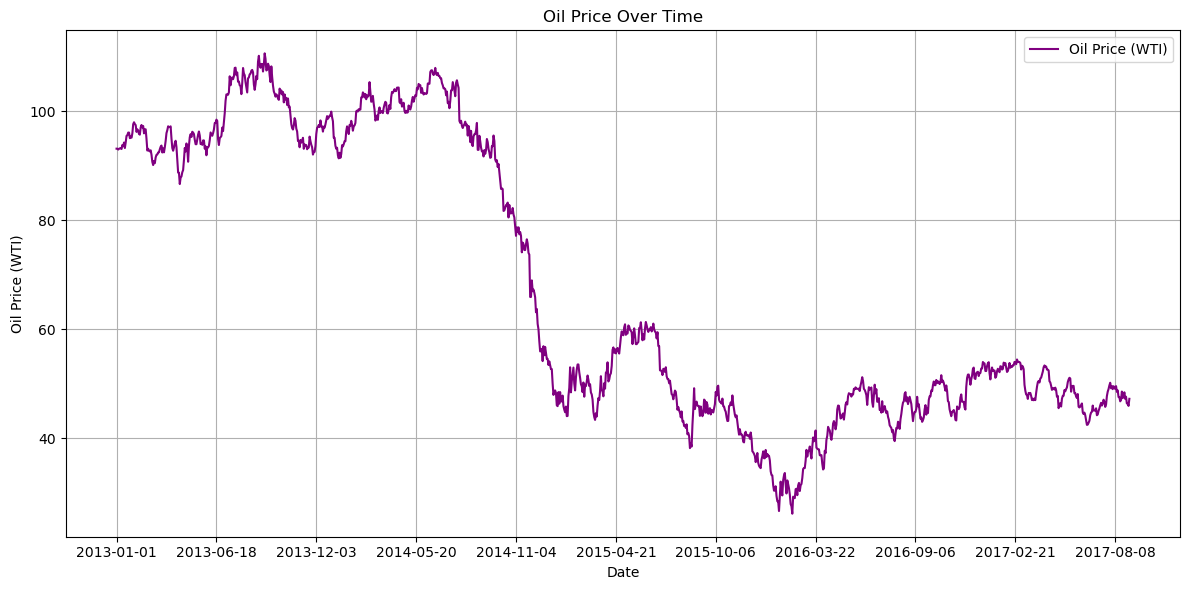

In [6]:
plt.figure(figsize=(12, 6),dpi=100)  # 设置图形大小
plt.plot(df_oil['date'], df_oil['dcoilwtico'], label='Oil Price (WTI)',color = 'purple')

plt.xticks(df_oil['date'][::120])
plt.xlabel('Date')
plt.ylabel('Oil Price (WTI)')
plt.title('Oil Price Over Time')
plt.legend()  # 添加图例
plt.grid()  # 添加网格线
plt.tight_layout()  # 调整布局以确保标签和标题不会被裁切
plt.show()

# transactions

In [7]:
df_t

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [8]:
df_t.set_index(['date','store_nbr'],inplace=True)

# stores

In [9]:
df_s.set_index(['store_nbr'],inplace=True)
df_s

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


# train 

In [24]:
df_train.shape

(1048575, 6)

In [10]:
df_train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

# holidays events

In [11]:
df_h = pd.read_csv('holidays_events.csv')
df_h

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


# Merge

In [12]:
df_merge = pd.concat([df_train,df_test],axis=0,ignore_index=True)
df_merge

,id,date,store_nbr,family,sales,onpromotion
0,0,2013/1/1,1,AUTOMOTIVE,0.0,0
1,1,2013/1/1,1,BABY CARE,0.0,0
2,2,2013/1/1,1,BEAUTY,0.0,0
3,3,2013/1/1,1,BEVERAGES,0.0,0
4,4,2013/1/1,1,BOOKS,0.0,0
...,...,...,...,...,...,...
1077082,3029395,2017/8/31,9,POULTRY,NaN,1
1077083,3029396,2017/8/31,9,PREPARED FOODS,NaN,0
1077084,3029397,2017/8/31,9,PRODUCE,NaN,1
1077085,3029398,2017/8/31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9


In [13]:
# 假设data_list是包含多个DataFrame的列表
data_list = [df_merge, df_oil, df_h]

# 先将date列转换为日期时间类型，并将其设置为索引
for i in range(len(data_list)):
    data_list[i]['date'] = pd.to_datetime(data_list[i]['date'])
    data_list[i].set_index('date', inplace=True)

# 初始化result为第一个DataFrame
result = data_list[0]

# 依次与后续DataFrame合并
for i in range(1, len(data_list)):
    result = result.merge(data_list[i], left_index=True, right_index=True, how='left')

# 现在result包含了多个DataFrame的合并结果
result

,id,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred
date,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2013-01-01,1,1,BABY CARE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2013-01-01,2,1,BEAUTY,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2013-01-01,3,1,BEVERAGES,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2013-01-01,4,1,BOOKS,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,3029395,9,POULTRY,NaN,1,47.26,NaN,NaN,NaN,NaN,NaN
2017-08-31,3029396,9,PREPARED FOODS,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN
2017-08-31,3029397,9,PRODUCE,NaN,1,47.26,NaN,NaN,NaN,NaN,NaN


In [14]:
result=result.reset_index()

In [15]:
result.set_index(['store_nbr'],inplace=True)

In [16]:
result

,date,id,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred
store_nbr,,,,,,,,,,,
1,2013-01-01,0,AUTOMOTIVE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,2,BEAUTY,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,3,BEVERAGES,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,4,BOOKS,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...
9,2017-08-31,3029395,POULTRY,NaN,1,47.26,NaN,NaN,NaN,NaN,NaN
9,2017-08-31,3029396,PREPARED FOODS,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN
9,2017-08-31,3029397,PRODUCE,NaN,1,47.26,NaN,NaN,NaN,NaN,NaN


In [17]:
result = result.merge(df_s,right_index=True,left_index=True,how='left')
result

,date,id,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
store_nbr,,,,,,,,,,,,,,,
1,2013-01-01,0,AUTOMOTIVE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,2013-01-01,2,BEAUTY,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,2013-01-01,3,BEVERAGES,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,2013-01-01,4,BOOKS,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2017-08-31,3029263,POULTRY,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3
54,2017-08-31,3029264,PREPARED FOODS,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3
54,2017-08-31,3029265,PRODUCE,NaN,1,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3


In [18]:
result.reset_index(inplace=True)
result

,store_nbr,date,id,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,1,2013-01-01,0,AUTOMOTIVE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,1,2013-01-01,2,BEAUTY,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,1,2013-01-01,3,BEVERAGES,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,1,2013-01-01,4,BOOKS,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093120,54,2017-08-31,3029263,POULTRY,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3
1093121,54,2017-08-31,3029264,PREPARED FOODS,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3
1093122,54,2017-08-31,3029265,PRODUCE,NaN,1,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3
1093123,54,2017-08-31,3029266,SCHOOL AND OFFICE SUPPLIES,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3


In [19]:
result.set_index(['date','store_nbr'],inplace=True)
result

id                      family  sales  onpromotion  \
date       store_nbr                                                            
2013-01-01 1                0                  AUTOMOTIVE    0.0            0   
           1                1                   BABY CARE    0.0            0   
           1                2                      BEAUTY    0.0            0   
           1                3                   BEVERAGES    0.0            0   
           1                4                       BOOKS    0.0            0   
...                       ...                         ...    ...          ...   
2017-08-31 54         3029263                     POULTRY    NaN            0   
           54         3029264              PREPARED FOODS    NaN            0   
           54         3029265                     PRODUCE    NaN            1   
           54         3029266  SCHOOL AND OFFICE SUPPLIES    NaN            0   
           54         3029267                     SEAFOOD    NaN            0   

                      dcoilwtico   type_x    locale locale_name  \
date       store_nbr                                              
2013-01-01 1               93.14  Holiday  National     Ecuador   
           1               93.14  Holiday  National     Ecuador   
           1               93.14  Holiday  National     Ecuador   
           1               93.14  Holiday  National     Ecuador   
           1               93.14  Holiday  National     Ecuador   
...                          ...      ...       ...         ...   
2017-08-31 54              47.26      NaN       NaN         NaN   
           54              47.26      NaN       NaN         NaN   
           54              47.26      NaN       NaN         NaN   
           54              47.26      NaN       NaN         NaN   
           54              47.26      NaN       NaN         NaN   

                             description transferred       city      state  \
date       store_nbr                                                         
2013-01-01 1          Primer dia del ano       False      Quito  Pichincha   
           1          Primer dia del ano       False      Quito  Pichincha   
           1          Primer dia del ano       False      Quito  Pichincha   
           1          Primer dia del ano       False      Quito  Pichincha   
           1          Primer dia del ano       False      Quito  Pichincha   
...                                  ...         ...        ...        ...   
2017-08-31 54                        NaN         NaN  El Carmen     Manabi   
           54                        NaN         NaN  El Carmen     Manabi   
           54                        NaN         NaN  El Carmen     Manabi   
           54                        NaN         NaN  El Carmen     Manabi   
           54                        NaN         NaN  El Carmen     Manabi   

                     type_y  cluster  
date       store_nbr                  
2013-01-01 1              D       13  
           1              D       13  
           1              D       13  
           1              D       13  
           1              D       13  
...                     ...      ...  
2017-08-31 54             C        3  
           54             C        3  
           54             C        3  
           54             C        3  
           54             C        3  

[1093125 rows x 14 columns]

In [20]:
result= result.merge(df_t,right_index=True,left_index=True,how='left')
result

C:\Users\89240\AppData\Local\Temp/ipykernel_12972/827996572.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  result= result.merge(df_t,right_index=True,left_index=True,how='left')


id                      family  sales  onpromotion  \
date       store_nbr                                                            
2013-01-01 1                0                  AUTOMOTIVE    0.0            0   
           1                1                   BABY CARE    0.0            0   
           1                2                      BEAUTY    0.0            0   
           1                3                   BEVERAGES    0.0            0   
           1                4                       BOOKS    0.0            0   
...                       ...                         ...    ...          ...   
2017-08-31 54         3029263                     POULTRY    NaN            0   
           54         3029264              PREPARED FOODS    NaN            0   
           54         3029265                     PRODUCE    NaN            1   
           54         3029266  SCHOOL AND OFFICE SUPPLIES    NaN            0   
           54         3029267                     SEAFOOD    NaN            0   

                      dcoilwtico   type_x    locale locale_name  \
date       store_nbr                                              
2013-01-01 1               93.14  Holiday  National     Ecuador   
           1               93.14  Holiday  National     Ecuador   
           1               93.14  Holiday  National     Ecuador   
           1               93.14  Holiday  National     Ecuador   
           1               93.14  Holiday  National     Ecuador   
...                          ...      ...       ...         ...   
2017-08-31 54              47.26      NaN       NaN         NaN   
           54              47.26      NaN       NaN         NaN   
           54              47.26      NaN       NaN         NaN   
           54              47.26      NaN       NaN         NaN   
           54              47.26      NaN       NaN         NaN   

                             description transferred       city      state  \
date       store_nbr                                                         
2013-01-01 1          Primer dia del ano       False      Quito  Pichincha   
           1          Primer dia del ano       False      Quito  Pichincha   
           1          Primer dia del ano       False      Quito  Pichincha   
           1          Primer dia del ano       False      Quito  Pichincha   
           1          Primer dia del ano       False      Quito  Pichincha   
...                                  ...         ...        ...        ...   
2017-08-31 54                        NaN         NaN  El Carmen     Manabi   
           54                        NaN         NaN  El Carmen     Manabi   
           54                        NaN         NaN  El Carmen     Manabi   
           54                        NaN         NaN  El Carmen     Manabi   
           54                        NaN         NaN  El Carmen     Manabi   

                     type_y  cluster  transactions  
date       store_nbr                                
2013-01-01 1              D       13           NaN  
           1              D       13           NaN  
           1              D       13           NaN  
           1              D       13           NaN  
           1              D       13           NaN  
...                     ...      ...           ...  
2017-08-31 54             C        3           NaN  
           54             C        3           NaN  
           54             C        3           NaN  
           54             C        3           NaN  
           54             C        3           NaN  

[1093125 rows x 15 columns]

In [22]:
result=result.reset_index()
result

,index,date,store_nbr,id,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,0,AUTOMOTIVE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,1,BABY CARE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,2,BEAUTY,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,3,BEVERAGES,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,4,BOOKS,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093120,1093120,2017-08-31,54,3029263,POULTRY,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3,NaN
1093121,1093121,2017-08-31,54,3029264,PREPARED FOODS,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3,NaN
1093122,1093122,2017-08-31,54,3029265,PRODUCE,NaN,1,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3,NaN
1093123,1093123,2017-08-31,54,3029266,SCHOOL AND OFFICE SUPPLIES,NaN,0,47.26,NaN,NaN,NaN,NaN,NaN,El Carmen,Manabi,C,3,NaN


In [23]:
result.to_csv('merge.csv')

C:\Anaconda2021\lib\site-packages\pandas\core\internals\blocks.py:2074: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [25]:
merge.drop(['Unnamed: 0','index'],axis=1,inplace=True)
train = merge.iloc[:1064613,:]
test = merge.iloc[1064613:,:]

NameError: name 'merge' is not defined

In [ ]:
train.to_csv('new_train.csv',index=True)
test.to_csv('new_test.csv',index=True)